# Finished!

### Some Analysis of the NOAA weather dataset ###

In this notebook we are analyzing a sample out of data that was downloaded from http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/, the main file is ghcnd_all.tar.gz which is about 2.4 GB which becomes around 20GB when uncompressed.

The data contains about 1 million station-year recordings. That is too much to analyzer on single core machine, so we start by taking a sample of 20,000 recordings of the maximal daily temperatures for a period of a 365 days starting on January 1st (the last day of leap years is discarded).

In [2]:
import pandas as pd
import numpy as np
from numpy import nan,shape
%pylab inline
print 'pandas version: ',pd.__version__
print 'numpy version:',np.__version__

Populating the interactive namespace from numpy and matplotlib
pandas version:  0.18.0
numpy version: 1.11.0


In [3]:
# read information about the stations
import pickle
Data_dir='../../Data/Weather'
stations=pickle.load(open(Data_dir+'/stations.pkl','r'))
print shape(stations)
stations.head()

(85284, 8)


,latitude,longitude,elevation,state,name,GSNFLAG,HCNFLAG,WMOID
ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
AF000040930,35.3170,69.0170,3366.0,NaN,NORTH-SALANG,GSN,NaN,40930.0
AG000060390,36.7167,3.2500,24.0,NaN,ALGER-DAR EL BEIDA,GSN,NaN,60390.0


### Plotting maps ###
Working through http://matplotlib.org/basemap/

* http://en.wikipedia.org/wiki/Map_projection
* http://matplotlib.org/basemap/users/mapsetup.html

In [5]:
#this code is using pandas dataframes
lons=stations.ix[:,'longitude'].values   #ix stands for index for a specify range
lats=stations.ix[:,'latitude'].values
elev=stations.ix[:,'elevation'].values
station_names=stations.index.values
ll=len(lons)
lonmin=-180;lonmax=180;latsmin=-80;latsmax=80;
select=(lons>lonmin) * (lons<lonmax)*(lats>latsmin)*(lats<latsmax) #* guess stands for intersect
print sum(select)
station_names=station_names[select]
lons=lons[select]
lats=lats[select]
elev=elev[select]
elev=[min(3000,max(e,0))/3000. for e in elev] # Normalize the elev with base 3000
print len(lons),len(lats),len(station_names),len(elev)

85273
85273 85273 85273 85273


### Using Basemap

Basemap is a library for drawing maps and placing annotations on the maps.

To install basemap on your computer follow [these directions](https://github.com/matplotlib/basemap)

In this notebook we use "For more about scatter, see [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

The Mercator projection that is we use in this notebook is expained [here](http://matplotlib.org/basemap/users/merc.html)

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'i' means use intermediate resolution coastlines.
plt.figure(figsize=(20,20),dpi=300)
m = Basemap(llcrnrlat=24,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-65,lat_ts=20,resolution='i')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries(linewidth=2)
m.drawstates(linewidth=1,color='blue')
#m.drawrivers()



# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
# draw map with markers for locations
x, y = m(lons,lats)   #transfer lat and lon to this specified map, brilliant 
z=x*0+40.
print shape(x),shape(y),shape(z)
m.scatter(x,y,2,z,cmap=plt.cm.jet,marker='o',edgecolors='none',zorder=10)   #z is for color different contrast with elev!
#m.plot(x,y,'.g')
plt.title('weather stations')
plt.show()


In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'i' means use intermediate resolution coastlines.
plt.figure(figsize=(20,20),dpi=300)
m = Basemap(llcrnrlat=24,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-65,lat_ts=20,resolution='i')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries(linewidth=2)
m.drawstates(linewidth=1,color='blue')
#m.drawrivers()



# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
# draw map with markers for locations
x, y = m(lons,lats)
z=np.array(elev)*99
print shape(x),shape(y),shape(z)
m.scatter(x,y,30,z,cmap=plt.cm.jet,marker='o',edgecolors='none',zorder=10) 
#m.plot(x,y,'.g')
plt.title('weather stations')
plt.show()


(85273,)


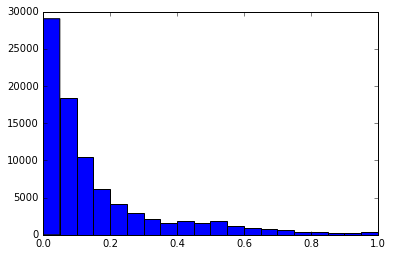

In [7]:
hist(elev,bins=20);
print shape(elev)